<a href="https://colab.research.google.com/github/nadireus/Statistics-with-Python/blob/main/Statistics_with_Python3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826




In [4]:
import numpy as np

In [3]:

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
1-stats.t.cdf(12.20, 39)

3.4416913763379853e-15

In [97]:
mean=13.20
st=2.50
#40>30
avgpay=12.50
#H1>H0?
# Calculate the test statistic
t_test = ( mean-avgpay )/(st/np.sqrt(40))
t_test
# Calculate p-value
pvalue=1 - stats.t.cdf(t_test, 39)

print(pvalue,t_test)


0.04219856533558264 1.7708754896942909



EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [78]:
df = pd.read_csv("soil.csv")

In [ ]:
df

In [9]:
df.Soil1.mean()

1.6918

In [10]:
df.Soil2.mean()

1.4171142857142858

In [79]:
indTest = stats.ttest_ind(df.dropna().Soil1, df.dropna().Soil2)
print(indTest)

Ttest_indResult(statistic=5.134893443609085, pvalue=3.440204643633666e-06)


In [81]:
pairedtest = stats.ttest_rel(df.dropna().Soil1, df.dropna().Soil2)
pairedtest

Ttest_relResult(statistic=5.309754126390885, pvalue=1.0725240883541837e-05)


EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [28]:
df1 = pd.read_csv("pisa.csv")

In [13]:
df1

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [14]:
df1.describe(include=['object'])

,Country Code,Continent_Code
count,70,65
unique,70,5
top,KOR,EU
freq,1,37


In [15]:
df1.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [18]:
stats.mode(df1)

ModeResult(mode=array([['MAC', 'EU', 21.97606771, 505.9713, 409.1301, 421.3373]],
      dtype=object), count=array([[ 1, 37,  1,  1,  1,  1]]))

In [20]:
df1.shape

(70, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


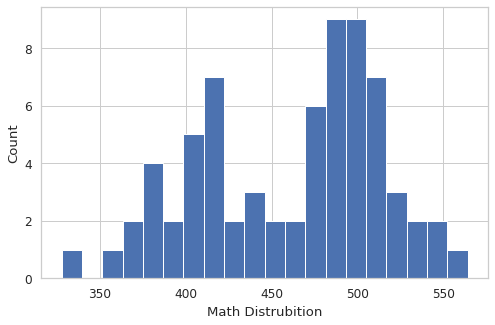

In [40]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df1.Math, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Math Distrubition', ylabel='Count');

In [ ]:
ASmath=df1[df1['Continent_Code']=='AS']['Math']
ASmath

In [ ]:
EUmath=df1[df1['Continent_Code']=='EU']['Math']
EUmath

In [11]:
indTest = stats.ttest_ind(ASmath, EUmath, equal_var = True)
indTest 

Ttest_indResult(statistic=-0.870055317967983, pvalue=0.38826888111307345)

In [20]:
import seaborn as sns



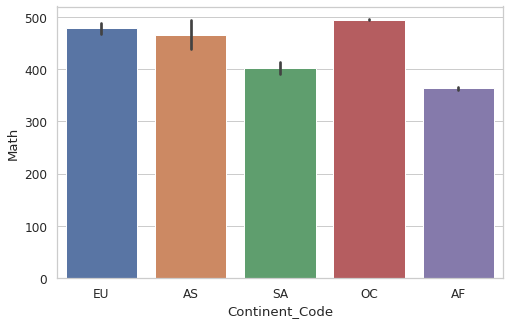

In [62]:
sns.barplot(x="Continent_Code", y="Math", data=df1)
plt.show()

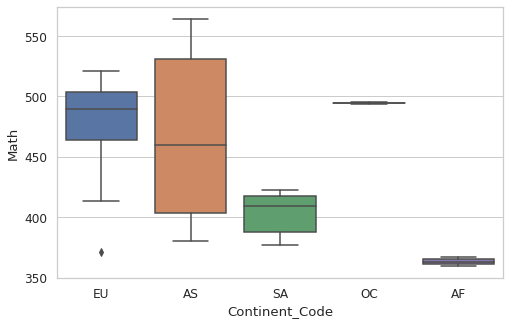

In [65]:
sns.boxplot(x="Continent_Code", y="Math" ,data=df1)
plt.show()

In [ ]:
x=df1[(df1['Continent_Code']=='EU')|(df1['Continent_Code']=='AS' )]
x

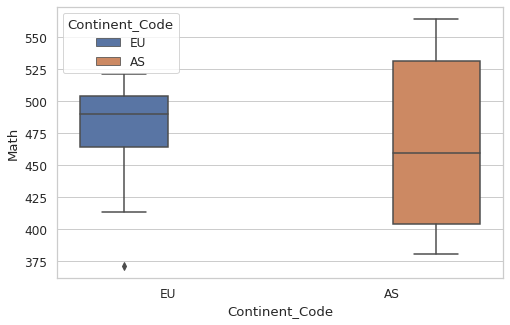

In [60]:
sns.boxplot(x="Continent_Code", y="Math", data=x, hue="Continent_Code")
plt.show()


Highly skewed distribution: If the skewness value is less than −1 or greater than +1.

Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.

Approximately symmetric distribution: If the skewness value is between −½ and +½.

In [23]:

print(df1.skew())

internet_users_per_100   -0.597903
Math                     -0.383761
Reading                  -0.604482
Science                  -0.392631
dtype: float64


EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

In [67]:
df3 = pd.read_csv("student.csv")

In [68]:
df3.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,8.004,0:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,NaN,0:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,8.473,0:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,NaN,0:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [69]:
df3.describe()

,ids,Rank,Gender,Athlete,Height,Weight,Smoking,Sprint,English,Reading,Math,Writing,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
count,435.000000,406.000000,426.000000,435.000000,408.000000,376.000000,411.000000,374.000000,409.000000,425.000000,422.000000,404.000000,414.000000,247.000000,247.000000,403.000000,393.000000
mean,35279.022989,2.199507,0.521127,0.422989,68.031765,181.031569,0.430657,6.581933,82.787555,82.070800,65.468009,79.521683,0.410628,2.781377,27.000000,5.461538,7.208651
std,8637.733605,1.098641,0.500141,0.494602,5.325655,42.749680,0.766324,1.227069,6.839803,7.661778,8.375930,5.511410,0.492543,0.698996,10.072905,2.421994,4.356233
min,20183.000000,1.000000,0.000000,0.000000,55.000000,101.710000,0.000000,4.503000,59.830000,55.110000,35.320000,64.060000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,28001.000000,1.000000,0.000000,0.000000,64.827500,153.860000,0.000000,5.587500,78.330000,77.190000,60.202500,75.750000,0.000000,3.000000,21.000000,4.000000,4.000000
50%,35350.000000,2.000000,1.000000,0.000000,67.570000,172.960000,0.000000,6.569000,83.150000,81.940000,65.445000,79.035000,0.000000,3.000000,27.000000,5.000000,6.000000
75%,42655.500000,3.000000,1.000000,1.000000,71.575000,204.307500,1.000000,7.458000,87.170000,87.080000,70.567500,83.687500,1.000000,3.000000,32.000000,7.000000,10.000000
max,49947.000000,4.000000,1.000000,1.000000,84.410000,350.070000,2.000000,9.597000,101.950000,103.620000,93.780000,93.010000,1.000000,4.000000,64.000000,13.000000,23.000000


In [70]:
df3.shape

(435, 23)

In [89]:
# H0: d_bar = 0
# H1: d_bar > 0
# Calculate test statistics using stats.ttest_rel()  
# moodpost - moodpre
pairedtest = stats.ttest_rel( df3.dropna().Math,df3.dropna().English,)
pairedtest

Ttest_relResult(statistic=-12.29684530879902, pvalue=5.160461862831768e-17)

In [90]:
stats.ttest_ind(df3.dropna().English, df3.dropna().Math)


Ttest_indResult(statistic=10.787205641803522, pvalue=1.1746036768217507e-18)

In [103]:
xdiff=df3.Math.mean()-df3.English.mean()
sdiff=df3.Math.std()-df3.English.std()
n=435

sx=sdiff/np.sqrt(n)
t=xdiff/sx
t

-235.15497230331823